In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,TargetEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, recall_score, average_precision_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('ultimate_home_challenge.csv')

In [4]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iphone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iphone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iphone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,android,11.8,False,82.4,3.13,4.9,0


In [5]:
df.shape

(49992, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49992 entries, 0 to 49991
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    49992 non-null  object 
 1   trips_in_first_30_days  49992 non-null  int64  
 2   signup_date             49992 non-null  object 
 3   avg_rating_of_driver    49992 non-null  float64
 4   avg_surge               49992 non-null  float64
 5   last_trip_date          49992 non-null  object 
 6   phone                   49992 non-null  object 
 7   surge_pct               49992 non-null  float64
 8   ultimate_black_user     49992 non-null  bool   
 9   weekday_pct             49992 non-null  float64
 10  avg_dist                49992 non-null  float64
 11  avg_rating_by_driver    49992 non-null  float64
 12  retained                49992 non-null  int64  
dtypes: bool(1), float64(6), int64(2), object(4)
memory usage: 4.6+ MB


In [7]:
df['signup_date'] =  pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49992 entries, 0 to 49991
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49992 non-null  object        
 1   trips_in_first_30_days  49992 non-null  int64         
 2   signup_date             49992 non-null  datetime64[ns]
 3   avg_rating_of_driver    49992 non-null  float64       
 4   avg_surge               49992 non-null  float64       
 5   last_trip_date          49992 non-null  datetime64[ns]
 6   phone                   49992 non-null  object        
 7   surge_pct               49992 non-null  float64       
 8   ultimate_black_user     49992 non-null  bool          
 9   weekday_pct             49992 non-null  float64       
 10  avg_dist                49992 non-null  float64       
 11  avg_rating_by_driver    49992 non-null  float64       
 12  retained                49992 non-null  int64 

In [9]:
df.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'retained'],
      dtype='object')

In [10]:
df_num = df.select_dtypes(include = 'number')
df_num

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,4,4.7,1.10,15.4,46.2,3.67,5.0,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0
...,...,...,...,...,...,...,...,...
49987,0,5.0,1.00,0.0,100.0,5.63,4.2,1
49988,1,4.9,1.00,0.0,0.0,0.00,4.0,0
49989,0,5.0,1.00,0.0,100.0,3.86,5.0,0
49990,2,3.0,1.00,0.0,100.0,4.58,3.5,0


In [11]:
df_cat = df.select_dtypes(include = ['category','object','bool'])
df_cat

,city,phone,ultimate_black_user
0,King's Landing,iphone,True
1,Astapor,android,False
2,Astapor,iphone,False
3,King's Landing,iphone,True
4,Winterfell,android,False
...,...,...,...
49987,King's Landing,iphone,False
49988,Astapor,iphone,False
49989,Winterfell,android,True
49990,Astapor,iphone,False


In [12]:
df.shape

(49992, 13)

In [13]:
for i in df_num.columns:
    print(i,':',df_num[i].nunique())

trips_in_first_30_days : 59
avg_rating_of_driver : 37
avg_surge : 115
surge_pct : 367
weekday_pct : 666
avg_dist : 2908
avg_rating_by_driver : 27
retained : 2


In [14]:
for i in df_cat.columns:
    print(i,':',df_cat[i].nunique())

city : 3
phone : 2
ultimate_black_user : 2


In [15]:
## encoding categorical feature 

In [16]:
df_cat.columns

Index(['city', 'phone', 'ultimate_black_user'], dtype='object')

In [17]:
cat_column = ['city', 'phone', 'ultimate_black_user']

In [18]:
df_encoded = pd.get_dummies(df, columns = cat_column, drop_first = True)

In [19]:
df_encoded.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_King's Landing,city_Winterfell,phone_iphone,ultimate_black_user_True
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,46.2,3.67,5.0,1,True,False,True,True
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,50.0,8.26,5.0,0,False,False,False,False
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,100.0,0.77,5.0,0,False,False,True,False
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,80.0,2.36,4.9,1,True,False,True,True
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,82.4,3.13,4.9,0,False,True,False,False


In [20]:
df_encoded1 = df_encoded.drop(columns = ['signup_date','last_trip_date'])

In [21]:
X = df_encoded1.drop(columns = ['retained'])
y = df_encoded1['retained']

### logistic regression basic 1

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

C:\Users\patid\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


classification_report

              precision    recall  f1-score   support

           0       0.74      0.86      0.79      6238
           1       0.67      0.49      0.57      3761

    accuracy                           0.72      9999
   macro avg       0.71      0.67      0.68      9999
weighted avg       0.71      0.72      0.71      9999

ROC_AUC: 0.7590960498983893
recall_score 0.4942834352565807


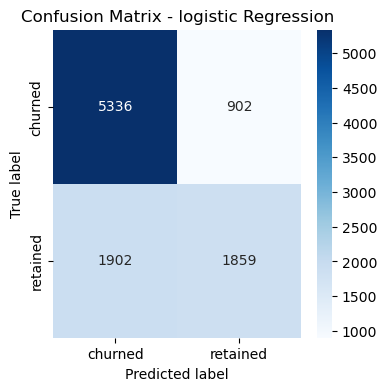

In [23]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, recall_score
from sklearn.linear_model import LogisticRegression
model_lr =LogisticRegression(max_iter=100)
model_lr.fit(X_train,y_train)
y_pred = model_lr.predict(X_test)

y_proba = model_lr.predict_proba(X_test)[:, 1]

pr_auc = average_precision_score(y_test, y_proba)

confusion_matrix = confusion_matrix(y_test, y_pred)
print('classification_report\n')
print(classification_report(y_test, y_pred))

print("ROC_AUC:", roc_auc_score(y_test, y_proba))

print('recall_score', recall_score(y_test, y_pred))
cm = confusion_matrix
labels = ['churned','retained',]
plt.figure(figsize=(4,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=labels,yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - logistic Regression')
plt.show()

In [24]:
df['retained'].value_counts() #for the full dataset 

retained
0    31188
1    18804
Name: count, dtype: int64

In [25]:
y_test.value_counts() # for the test value only and confusion matrix only shows test data

retained
0    6238
1    3761
Name: count, dtype: int64

###  cross validation 

In [26]:
model_lr =LogisticRegression(max_iter = 200)
cv = StratifiedKFold(n_splits =5, shuffle = True, random_state = 42)
cv_recall = cross_val_score(model_lr,X_train,y_train,cv=cv, scoring='recall',n_jobs = -1)
print('CV_recall (Per fold):',cv_recall)
print("CV Recall (mean):", cv_recall.mean())
print("CV Recall (std):", cv_recall.std())

CV_recall (Per fold): [0.48521103 0.4958458  0.50481888 0.49335106 0.48570479]
CV Recall (mean): 0.4929863114557039
CV Recall (std): 0.0072359496602978565


In [27]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_recall = cross_val_score(
    model_lr,
    X_train,
    y_train,
    cv=cv,
    scoring="recall",   
    n_jobs=-1
)

print("CV Recall (per fold):", cv_recall)
print("CV Recall (mean):", cv_recall.mean())
print("CV Recall (std):", cv_recall.std())

CV Recall (per fold): [0.48521103 0.4958458  0.50481888 0.49335106 0.48570479]
CV Recall (mean): 0.4929863114557039
CV Recall (std): 0.0072359496602978565


## feature engineering

In [28]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iphone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iphone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iphone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,android,11.8,False,82.4,3.13,4.9,0


In [29]:
df1 = df_encoded.copy()

In [30]:
df1.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_King's Landing,city_Winterfell,phone_iphone,ultimate_black_user_True
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,46.2,3.67,5.0,1,True,False,True,True
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,50.0,8.26,5.0,0,False,False,False,False
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,100.0,0.77,5.0,0,False,False,True,False
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,80.0,2.36,4.9,1,True,False,True,True
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,82.4,3.13,4.9,0,False,True,False,False


In [31]:
df1['signup_day'] = df1['signup_date'].dt.day

In [32]:
df1['signup_month'] = df1['signup_date'].dt.month

In [33]:
# df1['last_day'] = df1['last_trip_date'].dt.day

# df1['last_month'] = df1['last_trip_date'].dt.month

In [34]:
df1['trips_per_day_30d'] = df1['trips_in_first_30_days']/30

In [35]:
df1['is_weekday_heavy_user'] = df['weekday_pct'] > 0.6

In [36]:
df_encoded2 = df_encoded.drop(columns = ['signup_date','last_trip_date'])

In [37]:
X1 = df_encoded2.drop(columns = ['retained'])
y1 = df_encoded2['retained']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, stratify=y, random_state=42)

## logistic regression 

In [39]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, recall_score
from sklearn.linear_model import LogisticRegression
model_lr =LogisticRegression(max_iter = 500,class_weight="balanced")
model_lr.fit(X_train,y_train)
y_pred = model_lr.predict(X_test)

y_proba = model_lr.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC_AUC:", roc_auc_score(y_test, y_proba))
print('recall_score', recall_score(y_test, y_pred))

pr_auc = average_precision_score(y_test, y_proba)

              precision    recall  f1-score   support

           0       0.78      0.73      0.75      6238
           1       0.59      0.67      0.63      3761

    accuracy                           0.70      9999
   macro avg       0.69      0.70      0.69      9999
weighted avg       0.71      0.70      0.71      9999

ROC_AUC: 0.7591930614730296
recall_score 0.666578037755916


In [40]:
## feature extraction 

In [41]:
# get feature names
feature_names = X_train.columns

# get coefficients
coef = model_lr.coef_[0]

lr_importance = pd.DataFrame({
    "feature": feature_names,
    "coefficient": coef,
    "abs_coefficient": np.abs(coef)
}).sort_values(by="abs_coefficient", ascending=False)

lr_importance.head(10)

,feature,coefficient,abs_coefficient
7,city_King's Landing,1.735204,1.735204
9,phone_iphone,1.061831,1.061831
10,ultimate_black_user_True,0.853442,0.853442
8,city_Winterfell,0.510849,0.510849
2,avg_surge,-0.240218,0.240218
6,avg_rating_by_driver,-0.173002,0.173002
1,avg_rating_of_driver,-0.141648,0.141648
0,trips_in_first_30_days,0.125783,0.125783
5,avg_dist,-0.039071,0.039071
3,surge_pct,0.004353,0.004353


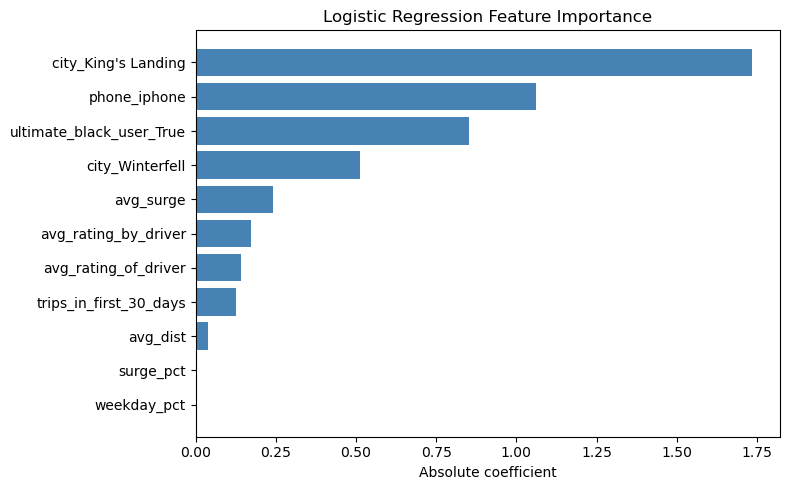

In [42]:
plt.figure(figsize=(8, 5))
plt.barh(lr_importance['feature'], lr_importance['abs_coefficient'], color='steelblue')

plt.xlabel('Absolute coefficient')
plt.title('Logistic Regression Feature Importance')
plt.gca().invert_yaxis() 
# Make labels readable
plt.tight_layout()
plt.show()

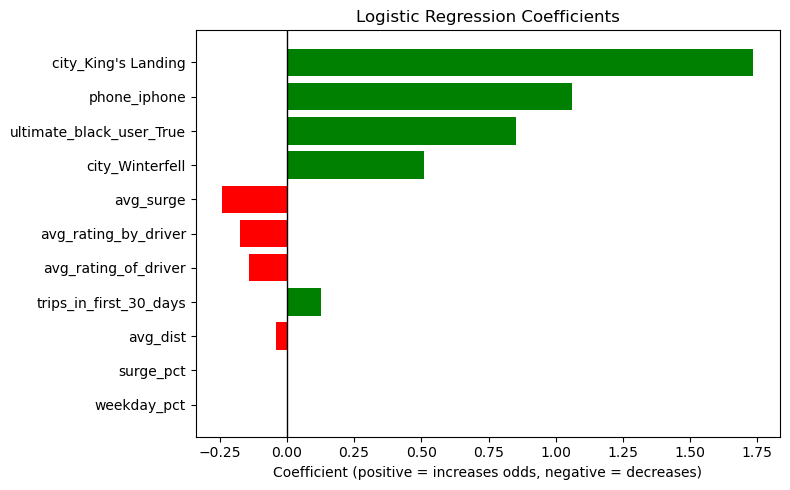

In [43]:
colors = lr_importance['coefficient'].apply(lambda x: 'green' if x > 0 else 'red')

plt.figure(figsize=(8, 5))
plt.barh(lr_importance['feature'], lr_importance['coefficient'], color=colors)

plt.xlabel('Coefficient (positive = increases odds, negative = decreases)')
plt.title('Logistic Regression Coefficients')
plt.axvline(0, color='black', linewidth=1)  # vertical line at 0
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

* City-level service quality is the strongest retention driver, Analyze what works in King’s Landing (driver availability, ETAs, cancellations) and replicate those operational practices in lower-retention cities.

* Premium and iPhone users retain better due to smoother experience and predictability, Offer early premium trials and focus on improving app stability and payment experience for non-iPhone users.

* High surge pricing and poor ride experience increase churn risk , Introduce surge transparency or caps for repeat users and proactively intervene when ride ratings drop.

* Early engagement helps but cannot offset bad experience or pricing → Use first-30-day incentives to build habits, while prioritizing consistent service quality and pricing stability.

## random Forest model

In [44]:
from sklearn.metrics import classification_report as clf_report

rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=20,
    random_state=42,
    n_jobs=-1,class_weight="balanced"
)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

y_pred_train = rf_model.predict(X_train)
y_proba_train = rf_model.predict_proba(X_train)[:, 1]
print("Train Recall:", recall_score(y_train, y_pred_train))
# print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("test Recall:", recall_score(y_test, y_pred))
print("test ROC-AUC:", roc_auc_score(y_test, y_proba))

#print("classification_report\n")

print(clf_report(y_test, y_pred))


Train Recall: 0.7820913381639301
test Recall: 0.7474076043605424
test ROC-AUC: 0.8544721952295711
              precision    recall  f1-score   support

           0       0.84      0.79      0.82      6238
           1       0.69      0.75      0.72      3761

    accuracy                           0.78      9999
   macro avg       0.76      0.77      0.77      9999
weighted avg       0.78      0.78      0.78      9999



### Cross validation of random forest

In [45]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_recall = cross_val_score(
    rf_model,
    X_train,
    y_train,
    cv=cv,
    scoring="recall",   
    n_jobs=-1
)

print("CV Recall (per fold):", cv_recall)
print("CV Recall (mean):", cv_recall.mean())
print("CV Recall (std):", cv_recall.std())

CV Recall (per fold): [0.74011299 0.76105018 0.75274177 0.75930851 0.75432181]
CV Recall (mean): 0.7535070541920338
CV Recall (std): 0.007364862554717526


In [46]:
# extract feature importance
rf_importance = rf_model.feature_importances_

# feature names
feature_names = X_train.columns

# build dataframe
rf_importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": rf_importance
})

# convert to percentage
rf_importance_df["importance_pct"] = (
    rf_importance_df["importance"] / rf_importance_df["importance"].sum()
) * 100

# sort
rf_importance_df = rf_importance_df.sort_values(
    by="importance_pct", ascending=False
)

rf_importance_df

,feature,importance,importance_pct
6,avg_rating_by_driver,0.183798,18.379843
7,city_King's Landing,0.141866,14.186618
4,weekday_pct,0.137829,13.782921
3,surge_pct,0.118473,11.847337
2,avg_surge,0.100481,10.048059
9,phone_iphone,0.075318,7.531849
0,trips_in_first_30_days,0.068593,6.859349
5,avg_dist,0.068273,6.827338
10,ultimate_black_user_True,0.055035,5.503526
1,avg_rating_of_driver,0.033337,3.333674


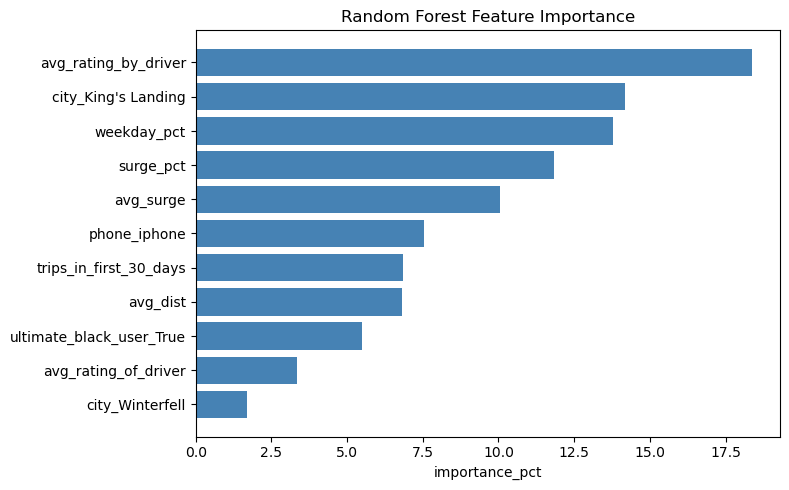

In [47]:
plt.figure(figsize=(8, 5))
plt.barh(rf_importance_df['feature'], rf_importance_df['importance_pct'], color='steelblue')

plt.xlabel('importance_pct')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis() 
# Make labels readable
plt.tight_layout()
plt.show()  

* Customer retention is driven primarily by ride experience and behavior, with avg_rating_by_driver contributing the most to loss reduction, showing that smooth, positive ride interactions are critical.

* City-level operations and habitual usage (King’s Landing, weekday usage) strongly influence retention, indicating retention is context- and routine-driven rather than demographic.

* Pricing consistency matters more than price level, as surge frequency and average surge significantly affect churn risk.

* Early engagement and premium usage help, but they are secondary to experience quality and predictable pricing.

  ####

* Protect ride experience first, monitor low driver-rated users and intervene early with service recovery.

* Fix city-specific operational gaps, replicate high-retention city playbooks in weaker regions.

* Reduce surge volatility, use surge caps, wait-and-save nudges, and transparent pricing.

* Build weekday habits early, target commuters and frequent weekday users with loyalty incentives.